<a href="https://colab.research.google.com/github/atoothman/Data-71200-Projects-/blob/main/DATA_71200_Project_3_Glass_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 71200 - Project 3 Glass Identification

This project involves the analysis of the [Glass Identification](https://archive.ics.uci.edu/dataset/42/glass+identification) dataset, sourced from the UC Irvine Machine Learning Repository. The dataset contains information on 6 types of glass defined in terms of their oxide content. The study of classification of types of glass was motivated by criminological investigation and broken glass left at crime scenes.

**Dataset Description**

1. ID Number
2. RI (refractive Index)
3. Na (Sodium)
4. MG (Magnesium)
5. Al (Aluminum)
6. Si (Silicon)
7. K (Potassium)
8. Ca (Calcium)
9. Ba (Barium)
10. Fe (Iron)
11. Type of Glass (Class)
      *   building_windows_float_processed
      *   building_windows_non_float_processed
      *   vehicle_windows_float_processed
      *   vehicle_windows_non_float_processed (none in this database)
      *   containers
      *   tableware
      *   headlamps

9 Features are included in the dataset. There are 8 continuous features, 1 integer feature and 1 categorical feature.

The categorical feature Type of Glass/"Class" is divided into seven distinct categories (listed above) which are associated with the product the glass created. "Class" will serve as the target in this project.

**Objective**
Project 3 is building off the work of [Project 1](https://colab.research.google.com/drive/1i24JixOkYadlSOzYcKsIA-W-WyRru1XJ#scrollTo=VQdeW82USQMA) & [Project 2](https://colab.research.google.com/drive/14o56wCeCk9yekREo-ReIgmDQYlM0dmbh).

The objective of this project is the application of unsupervised learning techniques on the Glass Identification dataset.


# Step 1: Load data including testing/training split from Project 1


*   Your testing and training split should be balanced
*   Your data should be clean and missing data should be addressed
*   All appropriate variables are converted to categorical variables (as ordinal or one hot)
*   Any necessary feature scaling should be performed
*   YOU SHOULD ONLY WORK ON YOUR TRAINING SET











### Load data from project 1 and drop ID Column

Dropped ID column as it contained sequential numbers for the dataset which is redundant information and provided by the index column

In [1]:
import pandas as pd

# Raw URL of the dataset file on GitHub
url = "https://raw.githubusercontent.com/atoothman/Data-71200-Projects-/main/glass%2Bidentification/glass.data"


# Load the dataset into DataFrame
glass_df = pd.read_csv(url, header=None, index_col=False, names=[
    'ID', 'Refractive Index', 'Sodium', 'Magnesium', 'Aluminum',
    'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Class'])

# Display the DataFrame before dropping 'ID'
print("Before dropping 'ID':")
print(glass_df.head())

# Drop the 'ID' column
glass_df.drop(columns=['ID'], inplace=True)

# Display the DataFrame after dropping 'ID'
print("\nAfter dropping 'ID':")
print(glass_df.head())

Before dropping 'ID':
   ID  Refractive Index  Sodium  Magnesium  Aluminum  Silicon  Potassium  \
0   1           1.52101   13.64       4.49      1.10    71.78       0.06   
1   2           1.51761   13.89       3.60      1.36    72.73       0.48   
2   3           1.51618   13.53       3.55      1.54    72.99       0.39   
3   4           1.51766   13.21       3.69      1.29    72.61       0.57   
4   5           1.51742   13.27       3.62      1.24    73.08       0.55   

   Calcium  Barium  Iron  Class  
0     8.75     0.0   0.0      1  
1     7.83     0.0   0.0      1  
2     7.78     0.0   0.0      1  
3     8.22     0.0   0.0      1  
4     8.07     0.0   0.0      1  

After dropping 'ID':
   Refractive Index  Sodium  Magnesium  Aluminum  Silicon  Potassium  Calcium  \
0           1.52101   13.64       4.49      1.10    71.78       0.06     8.75   
1           1.51761   13.89       3.60      1.36    72.73       0.48     7.83   
2           1.51618   13.53       3.55      1.54    

### Show info and description of data

In [2]:
# Display glass_data DF and check that all features are listed
display(glass_df)

# Show info on glass_df
print("Info on glass_df:")
glass_df.info()
print()

# Show description of glass_df
print("Description of glass_df:")
glass_df.describe()

,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Info on glass_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive Index  214 non-null    float64
 1   Sodium            214 non-null    float64
 2   Magnesium         214 non-null    float64
 3   Aluminum          214 non-null    float64
 4   Silicon           214 non-null    float64
 5   Potassium         214 non-null    float64
 6   Calcium           214 non-null    float64
 7   Barium            214 non-null    float64
 8   Iron              214 non-null    float64
 9   Class             214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB

Description of glass_df:


,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Divide into training and testing set

To create a balanced split StratifiedShuffleSplit will be utilized below with a 20% test size and 80% training size

In [3]:
# Utilize scikitlearn for a stratify split
from sklearn.model_selection import StratifiedShuffleSplit

# Separate the features (X) and the target variable (y) aka Class
X = glass_df.drop('Class', axis=1)
y = glass_df['Class']

# Create StratifiedShuffleSplit with 1 split, 20% test size, 80% training and random state 42
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Split data
for train_index, test_index in split.split(X, y):
   X_train = X.iloc[train_index]
   X_test = X.iloc[test_index]
   y_train = y.iloc[train_index]
   y_test = y.iloc[test_index]

# Check to confirm successful 80 : 20 split
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (171, 9)
X_test: (43, 9)
y_train: (171,)
y_test: (43,)


Confirming the split was successful. The training set has 80% of the original 214 instances, while the testing set has 20% of the original instances. 9 in the X-train and X_test show the number of columns/features.

### Check for missing values in the training and testing set

In [4]:
# Checking missing values in training set

# Check for missing values in X_train
missing_values = X_train.isnull().sum()

# Print missing values in X_train
print("Missing Values in X_train:")
print(missing_values)
print()

# Check for missing values in y_train
missing_values = y_train.isnull().sum()

# Print missing values in y_train
print("Missing Values in y_train:")
print(missing_values)

# Checking missing values in test set

# Check for missing values in X_test
missing_values = X_test.isnull().sum()

# Print missing values in X_test
print("Missing Values in X_test:")
print(missing_values)
print()

# Check for missing values in y_test
missing_values = y_test.isnull().sum()

# Print missing values in y_test
print("Missing Values in y_test:")
print(missing_values)

Missing Values in X_train:
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
dtype: int64

Missing Values in y_train:
0
Missing Values in X_test:
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
dtype: int64

Missing Values in y_test:
0


0 missing values in training and testing set

### Prepare data: Convert variables and preform feature scaling


The target variable "Class" is already a categorical variable an encoded as an integer: 1, 2, 3, 4, 5, 6, or 7. No need to convert with on hot encoded. No need to convert to ordinal as the classes are associated with glass from a particular object. For example, class 6 is table glass. They are not actually ranked.

In [5]:
# Target is already encoded as integer
display(y_train)

201    7
38     1
30     1
48     1
71     2
      ..
198    7
63     1
157    3
150    3
178    6
Name: Class, Length: 171, dtype: int64

Feature Scaling on X_train, no scaling needed for y_train

In [6]:
# Feature Scaling on X_train, no scaling needed for y_train

# Scaling method below used from class 6 lab

# Compute the minimum value per feature on the training set
#min_on_training = X_train.min(axis=0)

# Compute the range of each feature (max - min) on the training set
#range_on_training = (X_train - min_on_training).max(axis=0)

# Subtract the min, divide by range
# Afterward, min=0 and max=1 for each feature
#X_train_scaled = (X_train - min_on_training) / range_on_training
#print("X_train: Minimum for each feature\n", X_train_scaled.min(axis=0))
#print()
#print("X_train: Maximum for each feature\n", X_train_scaled.max(axis=0))
#print()

Feature Scaling on X_test

In [7]:
# Feature Scaling on X_test, no scaling needed for y_test

# Compute the minimum value per feature on the test set
#min_on_testing = X_test.min(axis=0)

# Compute the range of each feature (max - min) on the test set
#range_on_testing = (X_test - min_on_testing).max(axis=0)

# Subtract the min, divide by range
# Afterward, min=0 and max=1 for each feature
#X_test_scaled = (X_test - min_on_testing) / range_on_testing
#print("X_test: Minimum for each feature\n", X_test_scaled.min(axis=0))
#print()
#print("X_test: Maximum for each feature\n", X_test_scaled.max(axis=0))

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: PCA for feature selection

*  Show how many features do you need to retain to capture 95% of the variance
*  Evaluate whether this improves your best-performing model from Project 2

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

### PCA (95% variance)

In [10]:
# Fit PCA to data
pca = PCA(n_components=0.95)

# fit on and transforming the training set and then transform the test set
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### PCA on supervised learning

PCA feature selection accurately performed as a pre-processing step for supervised learning

In [11]:
# Decision Tree from preprocessed data no PCA applied

model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.65


In [12]:
# keep all the principal components of the data
pca1 = PCA()
# fit PCA model to data
pca1.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca1.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[4.64992829e-01 2.74213171e-01 1.19789288e-01 9.03112789e-02
 3.22091928e-02 1.65603839e-02 1.66203880e-03 2.61653583e-04
 1.64849354e-07]


In [13]:
# keep the components that explain 95% of the variance in the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
X_train_pca4 = pca4.fit_transform(X_train)
# transform data onto the first two principal components
X_test_pca4 = pca4.transform(X_test)


#model=LogisticRegression().fit(X2_train, y2_train)
model3 = DecisionTreeClassifier(random_state=0).fit(X_train_pca4, y_train)

print("Accuracy on training set: {:.2f}".format(model3.score(X_train_pca4, y_train)))
print("Accuracy on test set: {:.2f}".format(model3.score(X_test_pca4, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.67


In [14]:
# keep components to explain 95% of the variance
pca2 = PCA(n_components=0.95)
# fit PCA model to data
pca2.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca2.explained_variance_ratio_)


--------------------Explained variance ratio--------------------
[0.46499283 0.27421317 0.11978929 0.09031128 0.03220919]


NameError: name 'feat' is not defined

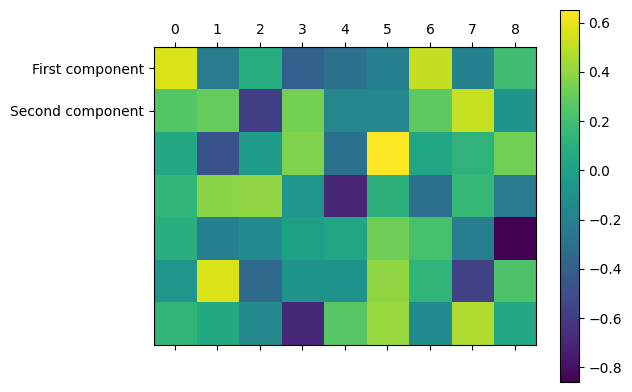

In [15]:
# Feature names for plotting
feature_names = ['Refractive Index', 'Sodium', 'Magnesium', 'Aluminum',
    'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron']

# plot the principal components
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(feat)),
           glass_df, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")


# Step 3: Apply 3-types of clustering on your data and visualize the output of each both with and without PCA run on it first. Calculate both ARI and Silhouette Coefficient for all six of the combinations.


*   k-Means (use an elbow visualization to determine the optimal numbers of clusters)
*   Aggolmerate/Hierarchical
*   DBSCAN









In [31]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score
from scipy.cluster.hierarchy import dendrogram, ward
!pip install mglearn
import mglearn

### K-Means run and visualized without PCA

*  Scatter Matrix of K-means
*  K-Means Elbow Visualizaiton
*  Calculate ARI
*  Calculate Silhouette Coefficient

**Scatter Matrix of K-means on Original Data (without PCA)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 1')

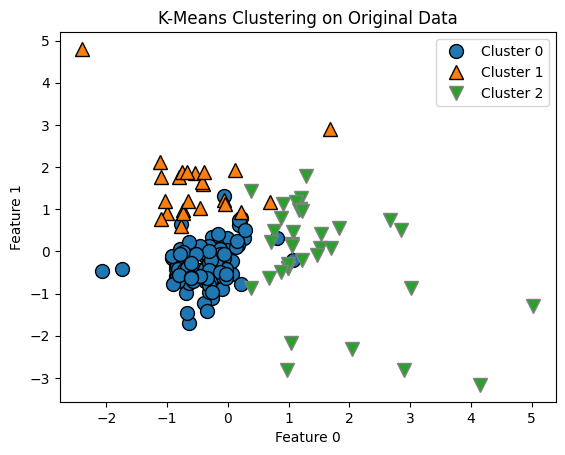

In [17]:
# K-Means on original data

# instantiate an instance of k-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

# get assignments (labels)
assignments=kmeans.labels_

# plot a scatter matrix of the results
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.title("K-Means Clustering on Original Data")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

K-Means graph above preforms clustering on the dataset. There appears to be some overlapping of the clusters which indicates that maybe a different number of clusters could be better. Checking more cluster options below.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


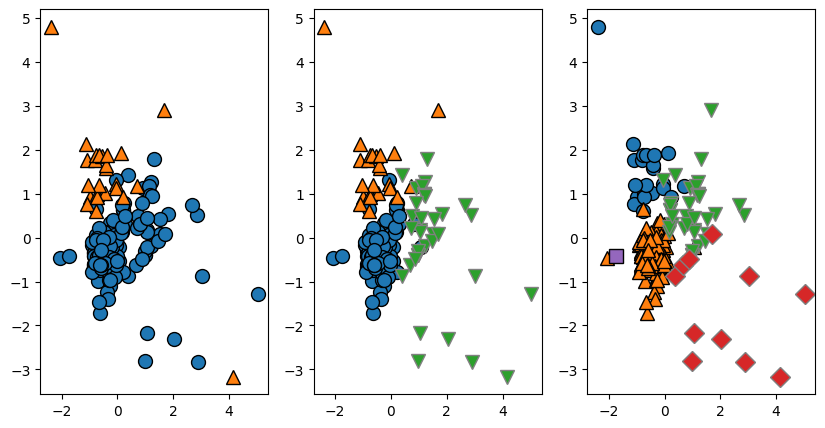

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], assignments, ax=axes[0])

# using three cluster centers:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)
assignments=kmeans.labels_

mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], assignments, ax=axes[1])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], assignments, ax=axes[2])

**K-Means Elbow Visualizaiton**

Using the elbow visulization to help understand what the optimal number of custers to use would be.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

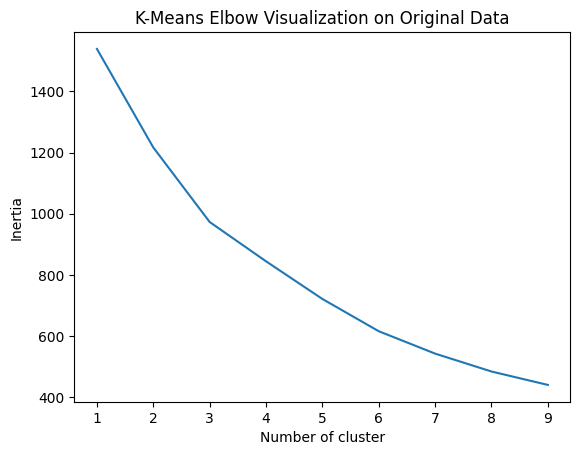

In [19]:
# Elbow visualization

inertiaVals = {}

for k in range(1, 10):
    kmeansTmp = KMeans(n_clusters=k, max_iter=1000).fit(X_train_scaled)
    inertiaVals[k] = kmeansTmp.inertia_
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.title("K-Means Elbow Visualization on Original Data")
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

From the above elbow visualization, it appears that 3 is the best number of clusters that should be used in K-Means. The graphs are appearing different when using scaled vs unscaled data. Unscaled data is giving a more distinct elbow shape, but still appearing at the 3. Scaled is giving more of a smooth curve with a slight elbow at 3. Elected to utilize the scaled data due to K-Means utilizing calculated distance for clustering of data points and centorids. Using scaling helps to ensure that all data points are on a set scale.

**ARI for K-Means without PCA**



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


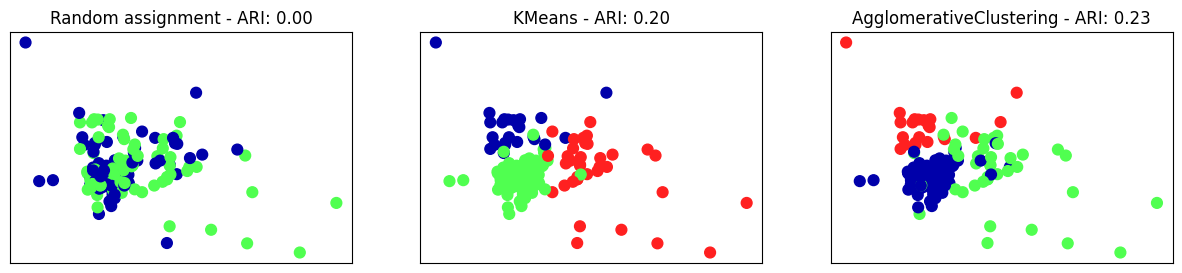

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
# Choosing 3 clusters as determined previously from k-means elbow
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3)]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_scaled))

# plot random assignment
axes[0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_train_scaled)
    ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))

ARI score is between -1 to 1.

**Calculate Silhouette Coefficient for K-Means on Original Data (without PCA)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


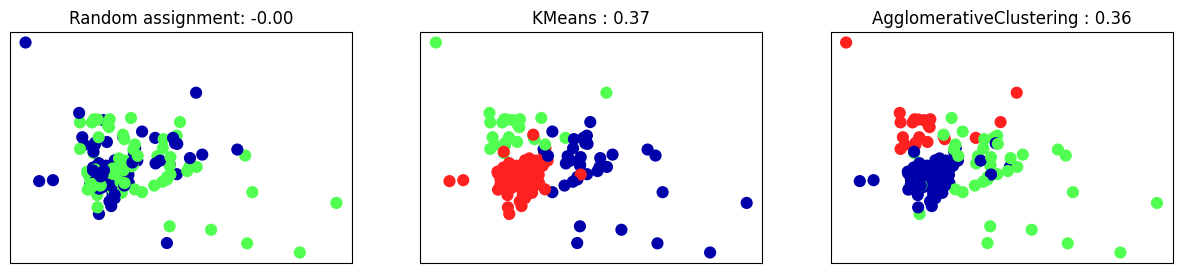

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_scaled))

# plot random assignment
axes[0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_train_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3)]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_train_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_train_scaled, clusters)))

### K-Means run and visualized with PCA


*  Scatter Matrix of K-means
*  K-Means Elbow Visualizaiton
*  Calculate ARI
*  Calculate Silhouette Coefficient







**Scatter Matrix of K-means with PCA**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 1')

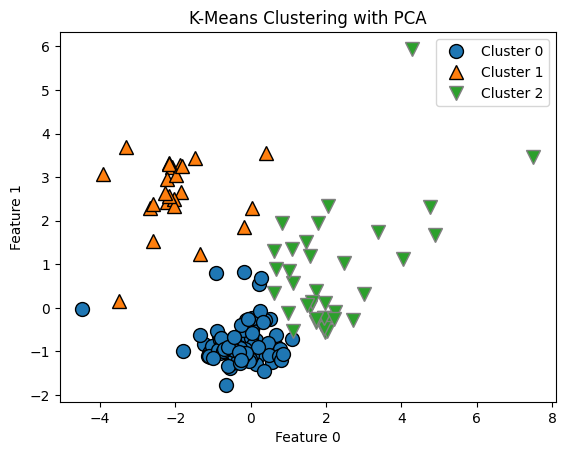

In [22]:
# instantiate an instance of k-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_pca)

# get assignments (labels)
assignments=kmeans.labels_

# plot a scatter matrix of the results
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], assignments)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.title("K-Means Clustering with PCA")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


After applying the PCA to K-Mean the clusters appear to have less overlap than without PCA. PCA helps show patterns and reduce dimensionality.

Dimensionality shows the number of features in the dataset. For our dataset we see 10 featuresm or it is 10 dimensional. When using PCA, it reduces dimensionality by cutting out lesser important features? Or transofmring the features into new components?


**K-Means Elbow Visualizaiton with PCA**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

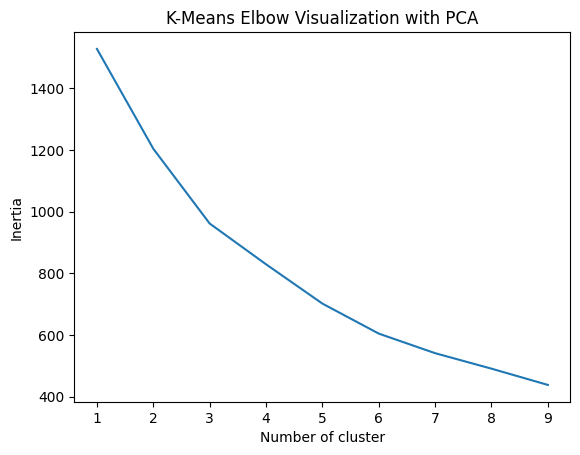

In [23]:
inertiaVals = {}

for k in range(1, 10):
    kmeansKpca = KMeans(n_clusters=k, max_iter=1000).fit(X_train_pca)
    inertiaVals[k] = kmeansKpca.inertia_
plt.figure()
plt.plot(list(inertiaVals.keys()), list(inertiaVals.values()))
plt.title("K-Means Elbow Visualization with PCA")
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

When comparing this to the K-means elbow without PCA, it looks almost identical. There is a little bit more definition around the 3 number of cluster. However, when compared to unscaled data, there is indeed a difference that the PCA application makes. The line is much smoother, with less points of change. Without, unscaled data there is more definition around 2 and 3, but with the PCA application 2 smooths out.

**ARI for K-Means with PCA**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


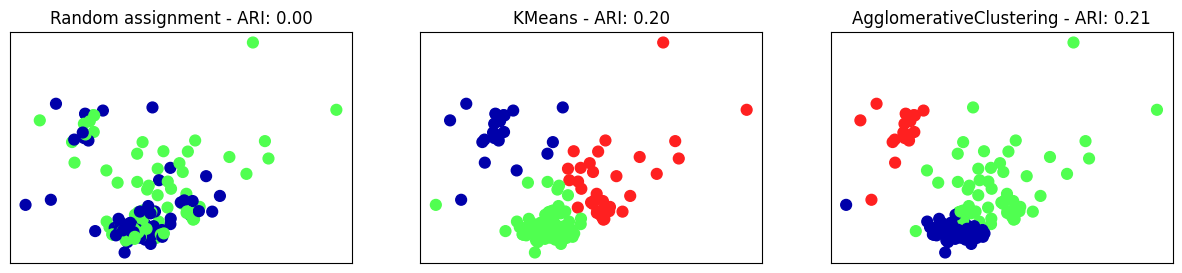

In [24]:

fig, axes = plt.subplots(1, 3, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3)]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_pca))

# plot random assignment
axes[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_train_pca)
    ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))

Without PCA the ARI is as follows:
- Random assignment 0.00
- KMeans 0.20
- Agglomerative Clustering 0.23

There is a slight difference in the ARI calculations Agglomerative Clustering. There are some differences seen in graphs. The KMeans with PCA has been clustering without overlapping.  

### Aggolmerate/Hierarchical run and visualized on original data (without PCA)

*  Scatter Matrix
*  Calculate ARI
*  Calculate Silhouette Coefficient

 **Scatter Matrix Aggolmerative Clustering on Original Data**

Text(0, 0.5, 'Feature 1')

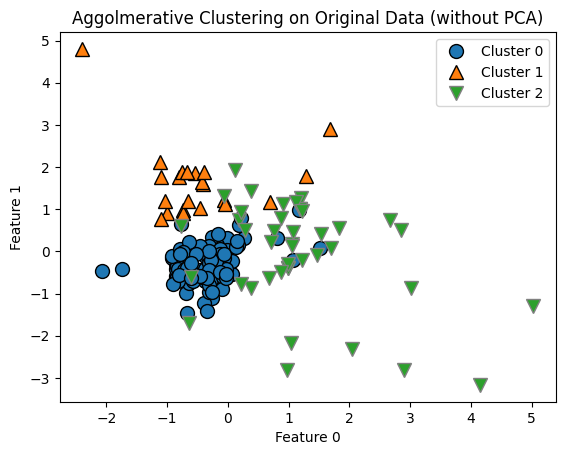

In [30]:
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X_train_scaled)

mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.title("Aggolmerative Clustering on Original Data (without PCA)")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**Dendrogram on Original Data**

Text(0, 0.5, 'Cluster distance')

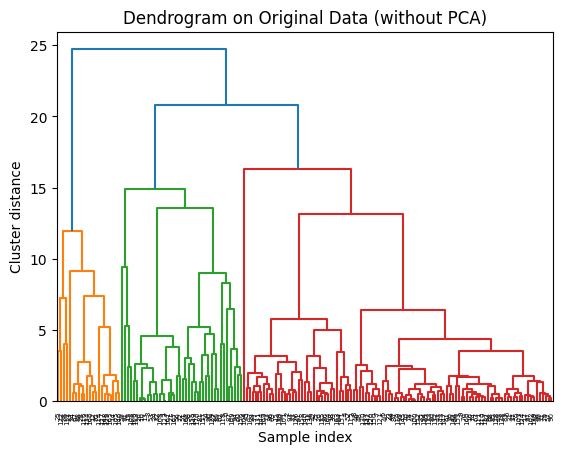

In [34]:
# Import the dendrogram function and the ward clustering function from SciPy
# from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X_train_scaled)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
plt.title("Dendrogram on Original Data (without PCA)")
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

**ARI for Aggolmerate on Original Data**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


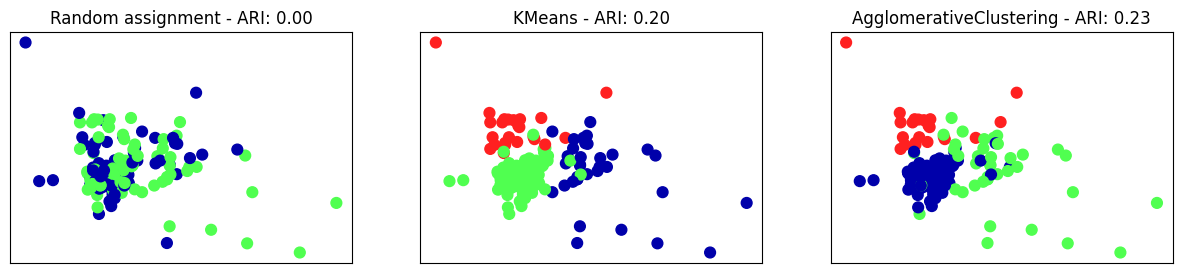

In [35]:
#from sklearn.metrics.cluster import adjusted_rand_score

fig, axes = plt.subplots(1, 3, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3)]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_scaled))

# plot random assignment
axes[0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y_train, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_train_scaled)
    ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y_train, clusters)))

**Silhouette Coefficient for Agglormerative Clustering on Original Data**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


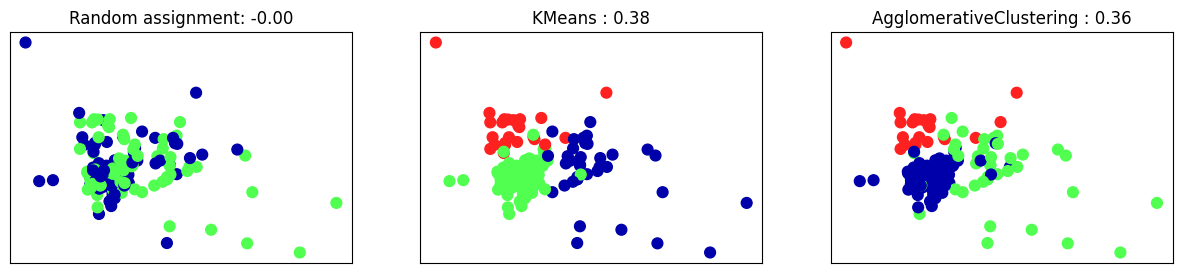

In [36]:
#from sklearn.metrics.cluster import silhouette_score

fig, axes = plt.subplots(1, 3, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_train_scaled))

# plot random assignment
axes[0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_train_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3)]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_train_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_train_scaled, clusters)))

### Aggolmerate/Hierarchical run and visualized with PCA

*  Scatter Matrix
*  Calculate ARI
*  Calculate Silhouette Coefficient

### DBSCAN run and visualized without PCA

*  Scatter Matrix
*  Calculate ARI
*  Calculate Silhouette Coefficient

### DBSCAN run and visualized with PCA

*  Scatter Matrix
*  Calculate ARI
*  Calculate Silhouette Coefficient